# Importing the required libraries for analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing the salary_data csv file

In [5]:
import os
os.chdir('V:/UTD/python/week 11')

salary = pd.read_csv('Salary_Data.csv')

The salary file has two columns: Years of experience and Salrary amount

In [7]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


There is no missing data in both the columns

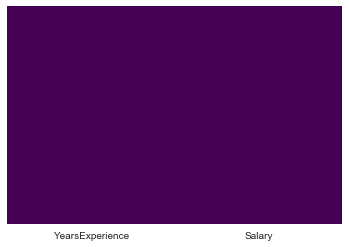

In [91]:
sns.heatmap(salary.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The scatter plot below shows that people with high years of experience have higher salary values

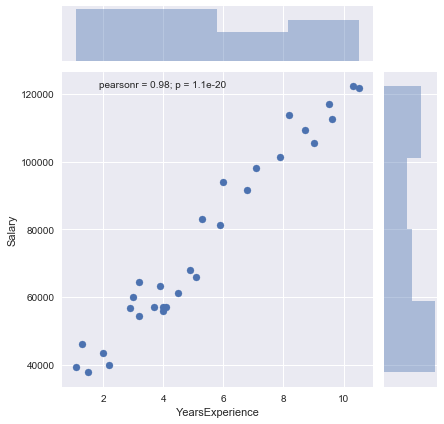

In [90]:
sns.jointplot(x='YearsExperience',y='Salary',data=salary,kind='scatter')

The graph below shows the linear fit with Salary as a dependent variable and Years of experience as independent variable.
Since salary increases linearly with Years of experience, linear regression model can be used to predict Salary using Years of Experience

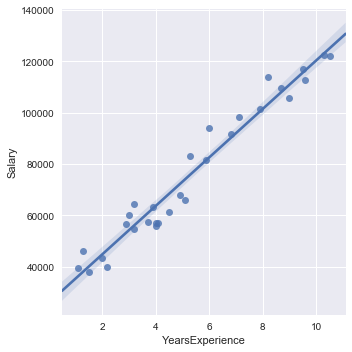

In [8]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary)

# Split the data into Test(70%) and train(30%)

In [100]:
X = customers[['YearsExperience']]
Y = customers['Salary']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


# Training the model

In [104]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

# OLS model
# import statsmodels.api as sm
# model = sm.OLS(Y_train, X_train).fit()
# model.summary()
# predictions = model.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Test predictions

In [105]:
predictions = lm.predict(X_test)

# Prediction vs Real data

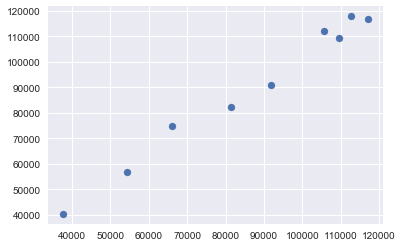

In [106]:
plt.scatter(Y_test,predictions)

# Evaluation

The MAPE(Mean Absolute Percentage Error) is ~3.5%. Hence the model is a good fit

In [97]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test,predictions))
print('MSE:', metrics.mean_squared_error(Y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('Mean absolute percentage error:', (metrics.mean_absolute_error(Y_test,predictions)*100/(np.mean(Y_test))))

MAE: 3038.68236125
MSE: 17978409.4973
RMSE: 4240.09545852
Mean absolute percentage error: 3.52459474088


# Residuals

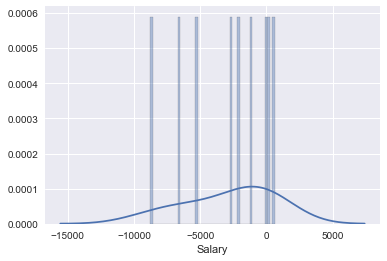

In [82]:
residuals = Y_test - predictions
sns.distplot(residuals, bins=50, hist_kws = dict(edgecolor="k"))

With one year increase in the experience, the salary is expected to increase by $9577

In [83]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
YearsExperience,9577.17175


# Conclusion

Overall it is a good model and Years of experience is a good estimator of Salary